# KeraTorch

> Implementing Keras clone with pytorch backend.

## Install

`pip install keratorch`

## How to use

In [ ]:
from keraTorch.model import Sequential
from keraTorch.layers import *
from keraTorch.losses import *

In [ ]:
# hide
from pathlib import Path
import requests
import gzip
import pickle

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")   

The data:

In [ ]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

Model definition:

In [ ]:
model = Sequential()
model.add(Dense(100, x_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Doesn't actually compile anything but to look like keras we specify the loss as below. `ce4softmax` means crossentropy for softmax loss.

In [ ]:
model.compile(ce4softmax)

Burrow for Fastai's learning rate finder to find best learning rate:

Min numerical gradient: 9.12E-03
Min loss divided by 10: 1.45E-02


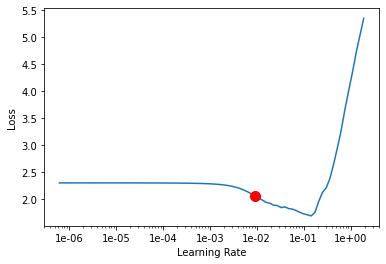

In [ ]:
bs = 256
model.lr_find(x_train, y_train, bs=bs)

We have the same `.fit` and `.predict` functions:

In [ ]:
model.fit(x_train, y_train, bs, epochs=10, lr=1e-2)

epoch,train_loss,valid_loss,time
0,2.298158,2.270433,00:01
1,2.249195,2.054905,00:01
2,2.082948,1.474771,00:01
3,1.806854,0.904923,00:01
4,1.526004,0.737786,00:01
5,1.293055,0.705958,00:01
6,1.105806,0.666755,00:01
7,0.958004,0.687373,00:01
8,0.838495,0.696255,00:01
9,0.741785,0.697341,00:01


In [ ]:
preds = model.predict(x_valid)
accuracy = (preds.argmax(axis=-1) == y_valid).mean()
print(f'Predicted accuracy is {accuracy:.2f}')

Predicted accuracy is 0.81
